In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#df['Change in elongation at break (%)'].min(), df['Change in elongation at break (%)'].max()
#df['Change in tensile strength (%)'].min(), df['Change in tensile strength (%)'].max()

In [2]:
df = pd.read_csv('radar.csv', low_memory = False)
df

,Polymer,Exposure medium,Temperature of medium (C),Weight change (%),Density change (%),Volume change (%),Change in hardness (IRHD),Change in tensile strength (%),Change in elongation at break (%)
0,Polypropylene,PENTANE,40,16.55,-10.72,24.79,3,-35,-2
1,Polypropylene,TOLUENE,40,22.60,-5.47,23.97,-20,-18,1
2,Polypropylene,PENTANE,60,21.41,-12.18,32.14,5,-26,-34
3,Polypropylene,TOLUENE,60,35.52,-5.75,37.50,-23,-6,-11
4,Polypropylene,PENTANE,80,41.63,-18.26,65.70,-21,-36,11
5,Polypropylene,TOLUENE,80,92.48,-6.98,97.80,-13,-9,-20


In [3]:
df['Exposed Polymer_temp'] = df.apply(lambda row:'{} {} {}C'.format(row.Polymer, row['Exposure medium'], row['Temperature of medium (C)']), axis = 1)


In [4]:
df.set_index('Exposed Polymer_temp', inplace = True)

In [5]:
df.drop(columns = ['Polymer', 'Exposure medium', 'Temperature of medium (C)'], axis = 1)

,Weight change (%),Density change (%),Volume change (%),Change in hardness (IRHD),Change in tensile strength (%),Change in elongation at break (%)
Exposed Polymer_temp,,,,,,
Polypropylene PENTANE 40C,16.55,-10.72,24.79,3,-35,-2
Polypropylene TOLUENE 40C,22.60,-5.47,23.97,-20,-18,1
Polypropylene PENTANE 60C,21.41,-12.18,32.14,5,-26,-34
Polypropylene TOLUENE 60C,35.52,-5.75,37.50,-23,-6,-11
Polypropylene PENTANE 80C,41.63,-18.26,65.70,-21,-36,11
Polypropylene TOLUENE 80C,92.48,-6.98,97.80,-13,-9,-20


In [ ]:
#values = df.loc['Polypropylene TOLUENE 80C'].tolist()
#values[6:]

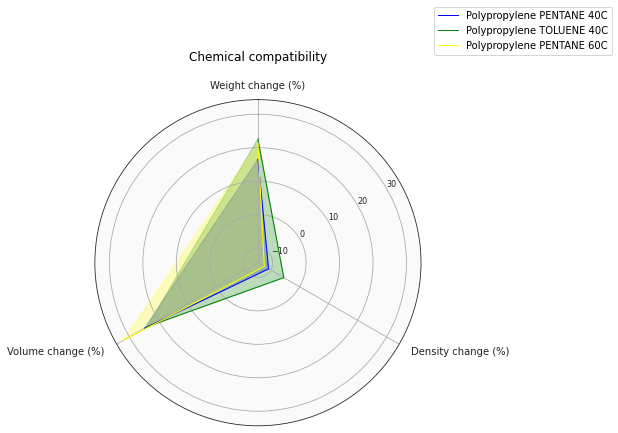

In [10]:
labels = ['Weight change (%)', 'Density change (%)', 'Volume change (%)']
num_vars = len(labels)

# Split the circle into even parts and save the angles
angles = np.linspace(0, 2*np.pi, num_vars, endpoint = False).tolist()

# The plot is a circle, so we need to "complete the loop" and append the start value to the end
#angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize = (6, 6), subplot_kw = dict(polar = True))

def add_to_radar(polymer, color):
    values = df.loc[polymer].tolist()
    values = values[3:6]
    ax.plot(angles, values, color = color, linewidth = 1, label = polymer)
    ax.fill(angles, values, color = color, alpha = 0.25)

# Add each index to the chart
add_to_radar('Polypropylene PENTANE 40C', 'blue')
add_to_radar('Polypropylene TOLUENE 40C', 'green')
add_to_radar('Polypropylene PENTANE 60C', 'yellow')
#add_to_radar('Polypropylene TOLUENE 60C', 'orange')
#add_to_radar('Polypropylene PENTANE 80C', 'red')
#add_to_radar('Polypropylene TOLUENE 80C', 'violet')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where it is in the circle
for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

#ax.set_ylim(-20, 100)
# You can also set gridlines manually
#ax.set_rgrids([-20, 0, 20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle of the first two axes
ax.set_rlabel_position(180/num_vars)

# Change the color of the tick labels
ax.tick_params(colors = '#222222')
ax.tick_params(axis = 'y', labelsize = 8)
# Change the color of the circular gridlines
ax.grid(color ='#AAAAAA')
# Change the color of the outermost gridline (the spine)
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself
ax.set_facecolor('#FAFAFA')

ax.set_title('Chemical compatibility', y = 1.1)
ax.legend(loc = 'upper right', bbox_to_anchor = (1.6, 1.3))


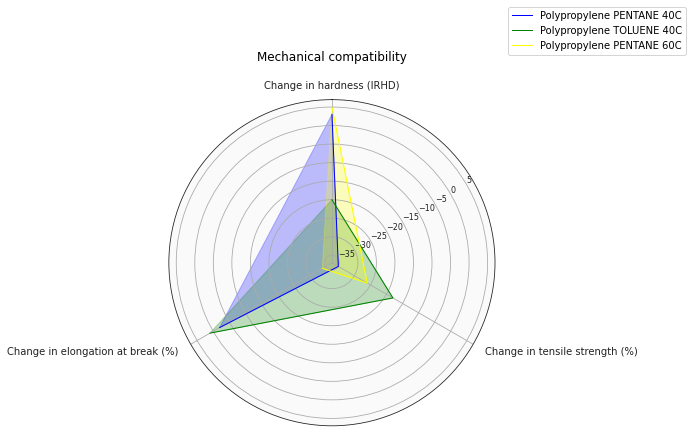

In [11]:
labels = ['Change in hardness (IRHD)', 'Change in tensile strength (%)', 'Change in elongation at break (%)']
num_vars = len(labels)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint = False).tolist()

fig, ax = plt.subplots(figsize = (6, 6), subplot_kw = dict(polar = True))

def add_to_radar(polymer, color):
    values = df.loc[polymer].tolist()
    values = values[6:]
    ax.plot(angles, values, color = color, linewidth = 1, label = polymer)
    ax.fill(angles, values, color = color, alpha = 0.25)

add_to_radar('Polypropylene PENTANE 40C', 'blue')
add_to_radar('Polypropylene TOLUENE 40C', 'green')
add_to_radar('Polypropylene PENTANE 60C', 'yellow')
#add_to_radar('Polypropylene TOLUENE 60C', 'orange')
#add_to_radar('Polypropylene PENTANE 80C', 'red')
#add_to_radar('Polypropylene TOLUENE 80C', 'violet')

ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

#ax.set_rgrids([-25, -15, -5, 0, 10])
ax.set_rlabel_position(180/num_vars)

ax.tick_params(colors = '#222222')
ax.tick_params(axis = 'y', labelsize = 8)
ax.grid(color ='#AAAAAA')
ax.spines['polar'].set_color('#222222')
ax.set_facecolor('#FAFAFA')
ax.set_title('Mechanical compatibility', y = 1.1)
ax.legend(loc = 'upper right', bbox_to_anchor = (1.6, 1.3))


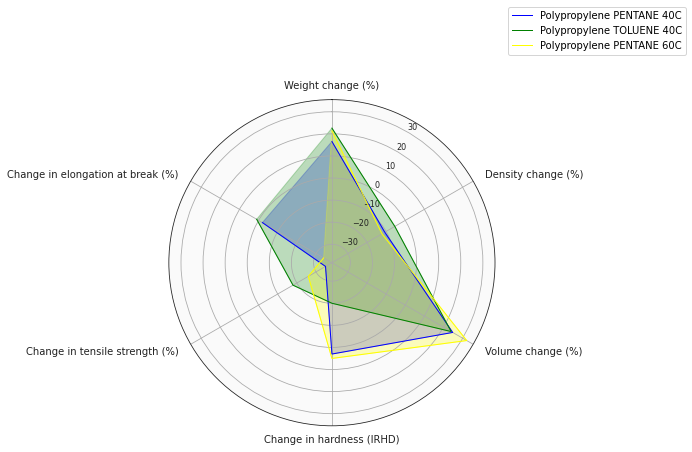

In [12]:
labels = ['Weight change (%)', 'Density change (%)', 'Volume change (%)', 'Change in hardness (IRHD)', 'Change in tensile strength (%)', 'Change in elongation at break (%)']
num_vars = len(labels)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint = False).tolist()

fig, ax = plt.subplots(figsize = (6, 6), subplot_kw = dict(polar = True))

def add_to_radar(polymer, color):
    values = df.loc[polymer].tolist()
    values = values[3:]
    ax.plot(angles, values, color = color, linewidth = 1, label = polymer)
    ax.fill(angles, values, color = color, alpha = 0.25)

add_to_radar('Polypropylene PENTANE 40C', 'blue')
add_to_radar('Polypropylene TOLUENE 40C', 'green')
add_to_radar('Polypropylene PENTANE 60C', 'yellow')
#add_to_radar('Polypropylene TOLUENE 60C', 'orange')
#add_to_radar('Polypropylene PENTANE 80C', 'red')
#add_to_radar('Polypropylene TOLUENE 80C', 'violet')

ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)

ax.set_thetagrids(np.degrees(angles), labels)

for label, angle in zip(ax.get_xticklabels(), angles):
    if angle in (0, np.pi):
        label.set_horizontalalignment('center')
    elif 0 < angle < np.pi:
        label.set_horizontalalignment('left')
    else:
        label.set_horizontalalignment('right')

#ax.set_rgrids([-25, -15, -5, 0, 10])
ax.set_rlabel_position(180/num_vars)

ax.tick_params(colors = '#222222')
ax.tick_params(axis = 'y', labelsize = 8)
ax.grid(color ='#AAAAAA')
ax.spines['polar'].set_color('#222222')
ax.set_facecolor('#FAFAFA')
#ax.set_title('Mechanical compatibility', y = 1.1)
ax.legend(loc = 'upper right', bbox_to_anchor = (1.6, 1.3))
